<a href="https://colab.research.google.com/github/KaptainK1/StockPredictor/blob/main/StockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from enum import Enum
from __future__ import print_function 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import json
import datetime
import requests

This section is for getting our data from the Polygon.io REST API.

In [ ]:
# polygon.io API Key
# Or_EUkWN5hs5BhApI04TMqRssJlV4fQo
# https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2020-06-01/2020-06-17?apiKey=Or_EUkWN5hs5BhApI04TMqRssJlV4fQo

key = "Or_EUkWN5hs5BhApI04TMqRssJlV4fQo"

# https://polygon.io/docs/get_v2_aggs_ticker__stocksTicker__range__multiplier___timespan___from___to__anchor
# ticker we want to check
stock_ticker = "GME"

# for user input, uncomment these lines
# stock_ticker = input("Enter ticker: ")
# print(f"ticker entered:{stock_ticker}")

# multiplier for the time span, so if the multiplier is 5, and timespan is minute, then we are getting 5 minute bars
multiplier = "1"

# for user input, uncomment these lines
# multiplier = input("Enter multiplier: ")
# print(f"multiplier:{multiplier}")

# the type of candles we want, ie. minute, hour, day, etc
# minute, hour, day, week, month, quarter, year
timespan = "minute"

# for user input, uncomment these lines
# timespan = input("Enter timespan as minute, hour, day, week, month, quarter, year: ")
# print(f"timespan:{timespan}")

#get the beginning date timetime frame
begin_timeframe = datetime.datetime(2021,10,1)
print(begin_timeframe)

# for user input, uncomment these lines
# begin_timeframe = input("Enter beginning timeframe as YYYY-MM-DD: ")
# print(f"begin_timeframe:{begin_timeframe}")


# convert the end datetime frame into the format needed for the api which is
# YYYY-MM-DD
begin_timeframe = begin_timeframe.strftime("%Y-%m-%d")
print(begin_timeframe)

#get the ending date timetime frame
#end_timeframe = datetime.datetime(2021,11,10)
end_timeframe = datetime.datetime.now()
print(end_timeframe)

# for user input, uncomment these lines
# end_timeframe = input("Enter ending timeframe as YYYY-MM-DD: ")
# print(f"end_timeframe:{end_timeframe}")

# convert the end datetime frame into the format needed for the api which is
# YYYY-MM-DD
end_timeframe = end_timeframe.strftime("%Y-%m-%d")
print(end_timeframe)

#adjust for splits
adjusted = True

#number of rows we want, 50000 is the max, 5000 is default
limit = 50000

# how we want to sort the data
# asc will return results in ascending order (oldest at the top), 
# desc will return results in descending order (newest at the top).
sort = "asc"

# now build our api query get request
query = f"https://api.polygon.io/v2/aggs/ticker/{stock_ticker}/range/{multiplier}/{timespan}/{begin_timeframe}/{end_timeframe}?adjusted={adjusted}&sort={sort}&limit={limit}&apiKey={key}"

#using a request, query the api to get our results
stock_data = requests.get(query)

# once we have the data as a json format, get the results object data
try:
  response_table = stock_data.json()["results"]
except ValueError:
  print("There is an error with the api, check the api status page to ensure it is up and running")
# create a new array of arrays to hold our data
# data_table = [["Close", "High", "Low", "Volume", "Volume-weighted-average-price"]]
data_table = []
# loop through the response table to get each row of data from the results array
for x in response_table:
  print(x)
  #test = np.array([x["c"], x["h"], x["l"], x["v"], x["vw"]])
  #test = np.array(map(float,(([x["c"], x["h"], x["l"], x["v"], x["vw"]])))
  #data = np.fromstring(f'{x["c"]}, {x["h"]}, {x["l"]}, {x["v"]}, {x["vw"]}', dtype=float)

  #first do a quick check to see if the volume is 0
  # if the volume is zero, it is most likely a weekend or holiday so we should
  #exclude those results as the market is not open
  if x["v"] != 0:
    data = ([x["t"], x["o"], x["h"], x["l"], x["c"],x["v"]])

  #convert each cell to a float from a string
  for y in data:
    y = float(y)
    print(y)
  data_table.append(data)
  #data_table.append(test)
print(data_table)
print(len(data_table))

Streaming output truncated to the last 5000 lines.
{'v': 1911, 'vw': 176.4832, 'a': 175.5671, 'o': 176.4, 'c': 176.615, 'h': 176.615, 'l': 176.35, 't': 1638903540000, 'n': 99, 'op': 175.18}
1638903540000.0
176.4
176.615
176.35
176.615
1911.0
{'v': 719, 'vw': 176.4731, 'a': 175.5675, 'o': 176.4787, 'c': 176.39, 'h': 176.4787, 'l': 176.39, 't': 1638903600000, 'n': 40, 'op': 175.18}
1638903600000.0
176.4787
176.4787
176.39
176.39
719.0
{'v': 4024, 'vw': 176.4999, 'a': 175.5701, 'o': 176.3323, 'c': 176.49, 'h': 176.625, 'l': 176.3323, 't': 1638903660000, 'n': 103, 'op': 175.18}
1638903660000.0
176.3323
176.625
176.3323
176.49
4024.0
{'v': 3516, 'vw': 176.4815, 'a': 175.5722, 'o': 176.5899, 'c': 176.33, 'h': 176.59, 'l': 176.33, 't': 1638903720000, 'n': 140, 'op': 175.18}
1638903720000.0
176.5899
176.59
176.33
176.33
3516.0
{'v': 3197, 'vw': 176.4216, 'a': 175.5742, 'o': 176.33, 'c': 176.5302, 'h': 176.69, 'l': 176.1009, 't': 1638903840000, 'n': 83, 'op': 175.18}
1638903840000.0
176.33
176.

In [ ]:
#use this module to save a text file of our data
data_file = open("data-file.csv", "w")
for row in data_table:
  t,o,h,l,c,v = row
  df = pd.DataFrame(row)
  t = df.transpose()
  # display(t[0:])
  t.to_csv(data_file, header=False, index=False)
data_file.close()

Epoch 1/6
1249/1249 [==============================] - 182s 139ms/step - loss: 0.0048
Epoch 2/6
1249/1249 [==============================] - 172s 138ms/step - loss: 0.0014
Epoch 3/6
1249/1249 [==============================] - 175s 140ms/step - loss: 8.5099e-04
Epoch 4/6
1249/1249 [==============================] - 176s 141ms/step - loss: 6.3766e-04
Epoch 5/6
1249/1249 [==============================] - 174s 139ms/step - loss: 5.4865e-04
Epoch 6/6
1249/1249 [==============================] - 176s 141ms/step - loss: 5.3096e-04


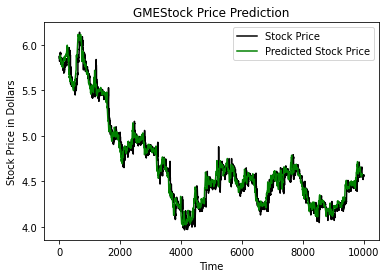

In [ ]:
##trains a neural network model in TensorFlow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


def train_data():
    # dataset_train = pd.read_csv('data.csv')
    # training_set = dataset_train.iloc[:, 1:4].values
    dataset_train = pd.read_csv('data-file.csv')
    training_set = dataset_train.iloc[:, 1:4].values
    real_stock_price = dataset_train.iloc[int(len(dataset_train) * 0.8):, 1:2].values
    dataset_train.head()

    sc = MinMaxScaler(feature_range=(0, 1))
    training_set_scaled = sc.fit_transform(training_set)

    X_train = []
    y_train = []

    for i in range(60, int(len(dataset_train) * 0.8)):
        X_train.append(training_set_scaled[i - 60:i, :])
        y_train.append(training_set_scaled[i, :])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 3))


    X_test = []
    for i in range(int(len(dataset_train) * 0.8) + 60, len(dataset_train)):
        X_test.append(training_set_scaled[i - 60:i, :])

    X_test, real_stock_price = np.array(X_test), np.array(real_stock_price)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 3))

    return X_train, y_train, X_test, real_stock_price, sc



def stock_model(X_train, y_train):
    regressor = Sequential()
    regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 3)))

    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))

    regressor.add(Dense(units=3))

    regressor.compile(optimizer='adam', loss='mean_squared_error')
    regressor.fit(X_train, y_train, epochs=6, batch_size=32)

    return regressor


def main():
    X_train, y_train, X_test, real_stock_price, sc = train_data()

    regressor = stock_model(X_train, y_train)
    predicted_stock_price = regressor.predict(X_test)

    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    plt.plot(real_stock_price, color='black', label='Stock Price')
    plt.plot(predicted_stock_price[:, 0], color='green', label='Predicted Stock Price')
    plt.title(stock_ticker + ' Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price in Dollars')
    plt.legend()
    plt.show()


if __name__ == '__main__':
    main()